# Credit Risk Benchmark Dataset

#### Overview:
This dataset has been designed as a benchmark for AutoML and predictive modeling in the financial domain. It focuses on assessing credit risk by predicting whether a borrower will experience serious delinquency within two years. The data comprises a mix of financial metrics and personal attributes, which allow users to build and evaluate models for credit risk scoring.

#### Problem Statement
Risk Management: Build and validate credit scoring models to forecast borrower default risks.

#### Column Descriptions:
Below is a list of the available columns along with their abbreviated names for ease-of-use:

rev_util: Ratio of revolving credit utilization (balance/credit limit)

age: Age of the borrower

late_30_59: Number of times 30-59 days past due (worse than current)

debt_ratio: Debt to income (or assets) ratio

monthly_inc: Monthly income of the borrower

open_credit: Number of open credit lines and loans

late_90: Number of times 90 days or more late on a payment

real_estate: Number of real estate loans or credit lines

late_60_89: Number of times 60-89 days past due (worse than current)

dependents: Number of dependents

dlq_2yrs: Target variable indicating if a serious delinquency occurred in the next 2 years (0 = No, 1 = Yes)

In [90]:
## Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,confusion_matrix,classification_report,roc_curve,cohen_kappa_score)
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier


In [91]:
## Loading Dataset
data=pd.read_csv(r"C:\Users\Hp\Downloads\archive (7)\Credit Risk Benchmark Dataset.csv")

In [92]:
data.head()

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,dlq_2yrs
0,0.006999,38.0,0.0,0.302150,5440.0,4.0,0.0,1.0,0.0,3.0,0
1,0.704592,63.0,0.0,0.471441,8000.0,9.0,0.0,1.0,0.0,0.0,0
2,0.063113,57.0,0.0,0.068586,5000.0,17.0,0.0,0.0,0.0,0.0,0
3,0.368397,68.0,0.0,0.296273,6250.0,16.0,0.0,2.0,0.0,0.0,0
4,1.000000,34.0,1.0,0.000000,3500.0,0.0,0.0,0.0,0.0,1.0,0


In [93]:
## Rows and Columns
print(f'No of Rows: {data.shape[0]}')
print(f'No of Columns: {data.shape[1]}')

No of Rows: 16714
No of Columns: 11


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16714 entries, 0 to 16713
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   rev_util     16714 non-null  float64
 1   age          16714 non-null  float64
 2   late_30_59   16714 non-null  float64
 3   debt_ratio   16714 non-null  float64
 4   monthly_inc  16714 non-null  float64
 5   open_credit  16714 non-null  float64
 6   late_90      16714 non-null  float64
 7   real_estate  16714 non-null  float64
 8   late_60_89   16714 non-null  float64
 9   dependents   16714 non-null  float64
 10  dlq_2yrs     16714 non-null  int64  
dtypes: float64(10), int64(1)
memory usage: 1.4 MB


In [95]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
rev_util,16714.0,4.799862,204.062345,0.0,0.082397,0.443080,0.926637,22000.0
age,16714.0,48.798672,13.906078,21.0,38.000000,48.000000,58.000000,101.0
late_30_59,16714.0,1.110267,7.172890,0.0,0.000000,0.000000,1.000000,98.0
debt_ratio,16714.0,30.980298,719.694859,0.0,0.155971,0.322299,0.533426,61106.5
monthly_inc,16714.0,6118.120258,5931.841779,0.0,3128.500000,5000.000000,7573.000000,250000.0
open_credit,16714.0,8.503709,5.370965,0.0,5.000000,8.000000,11.000000,57.0
late_90,16714.0,0.863827,7.167576,0.0,0.000000,0.000000,0.000000,98.0
real_estate,16714.0,1.047445,1.272565,0.0,0.000000,1.000000,2.000000,29.0
late_60_89,16714.0,0.734354,7.138737,0.0,0.000000,0.000000,0.000000,98.0
dependents,16714.0,0.944358,1.198791,0.0,0.000000,0.000000,2.000000,8.0


## Exploratory Data Analysis

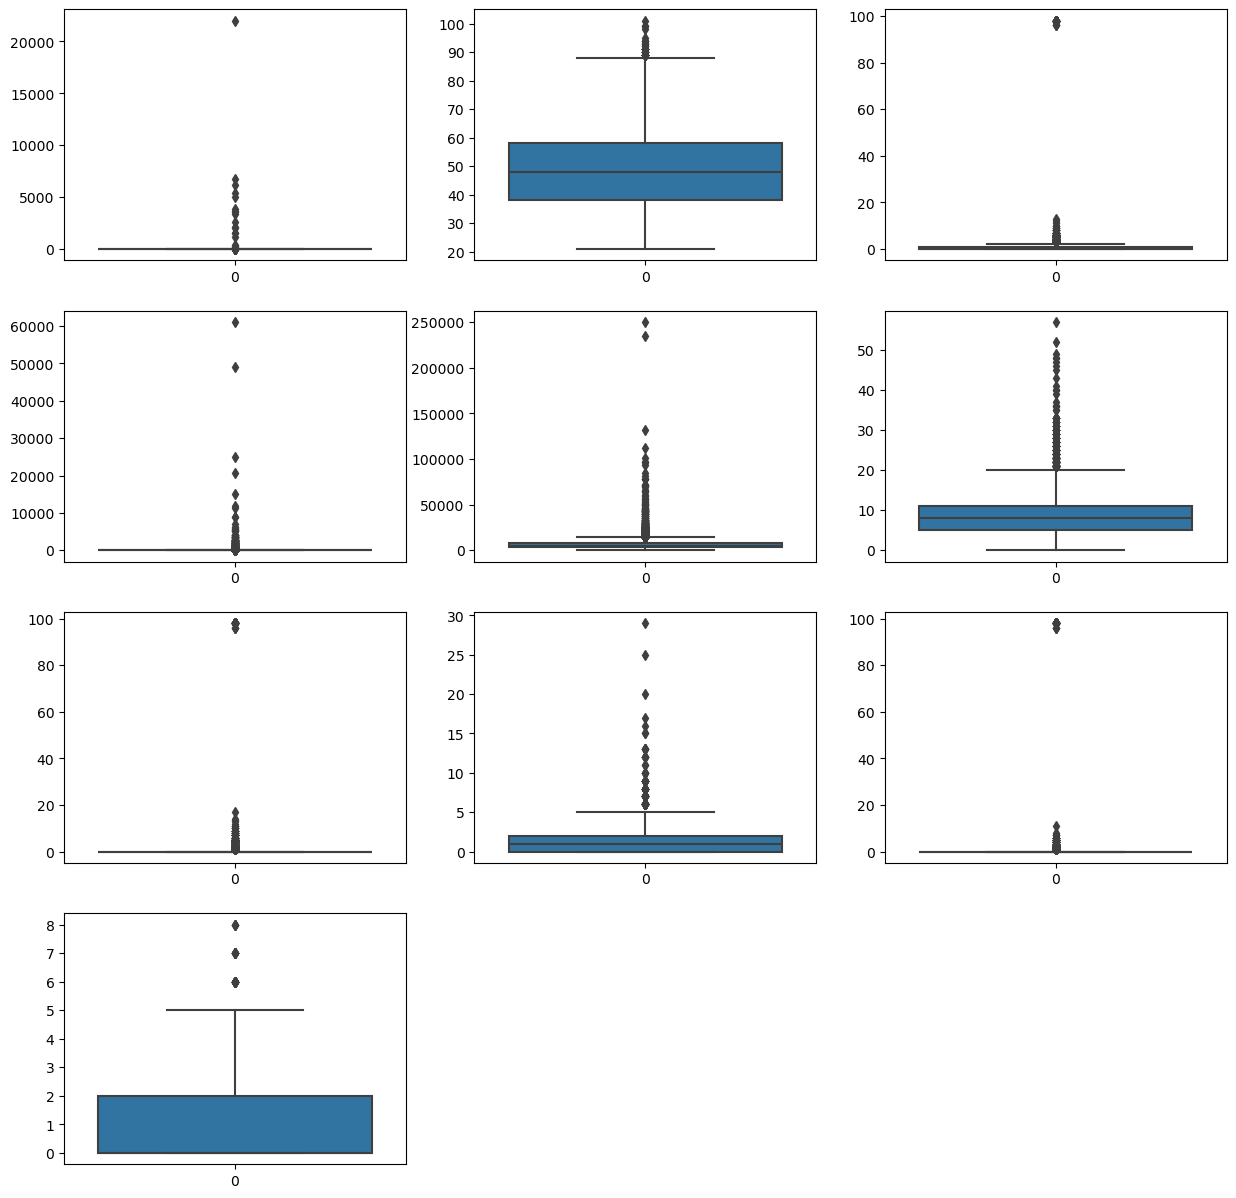

In [96]:
## Univariate Analysis
plt.figure(figsize=(15,15))
t=1
for i in data.columns:
  if i!='dlq_2yrs':
    plt.subplot(4,3,t)
    sns.boxplot(data[i])
    t+=1
plt.show()

rev_util: Most values are low, but extreme outliers suggest unusually high credit utilization.

age: Age is fairly well-distributed with minimal outliers and a median around 50.

late_30_59: Most borrowers have few or no late payments, but a few have excessive delinquencies.

debt_ratio: Majority of borrowers have low debt ratios, with several extreme outliers likely indicating data issues.

monthly_inc: Income is skewed with most values on the lower side and a few very high outliers.

open_credit: Typical borrowers have fewer than 15 open lines, but a few have more than 50.

late_90: Most borrowers have no extreme delinquencies, but a few have very high counts, indicating severe credit issues.

real_estate: Majority of borrowers have 0–2 real estate credit lines, with some outliers having over 20.

late_60_89: Late payments in the 60–89 day range are rare, though a few borrowers have very high counts.

dependents: Most borrowers have between 0 and 2 dependents, with few outliers going up to 8.

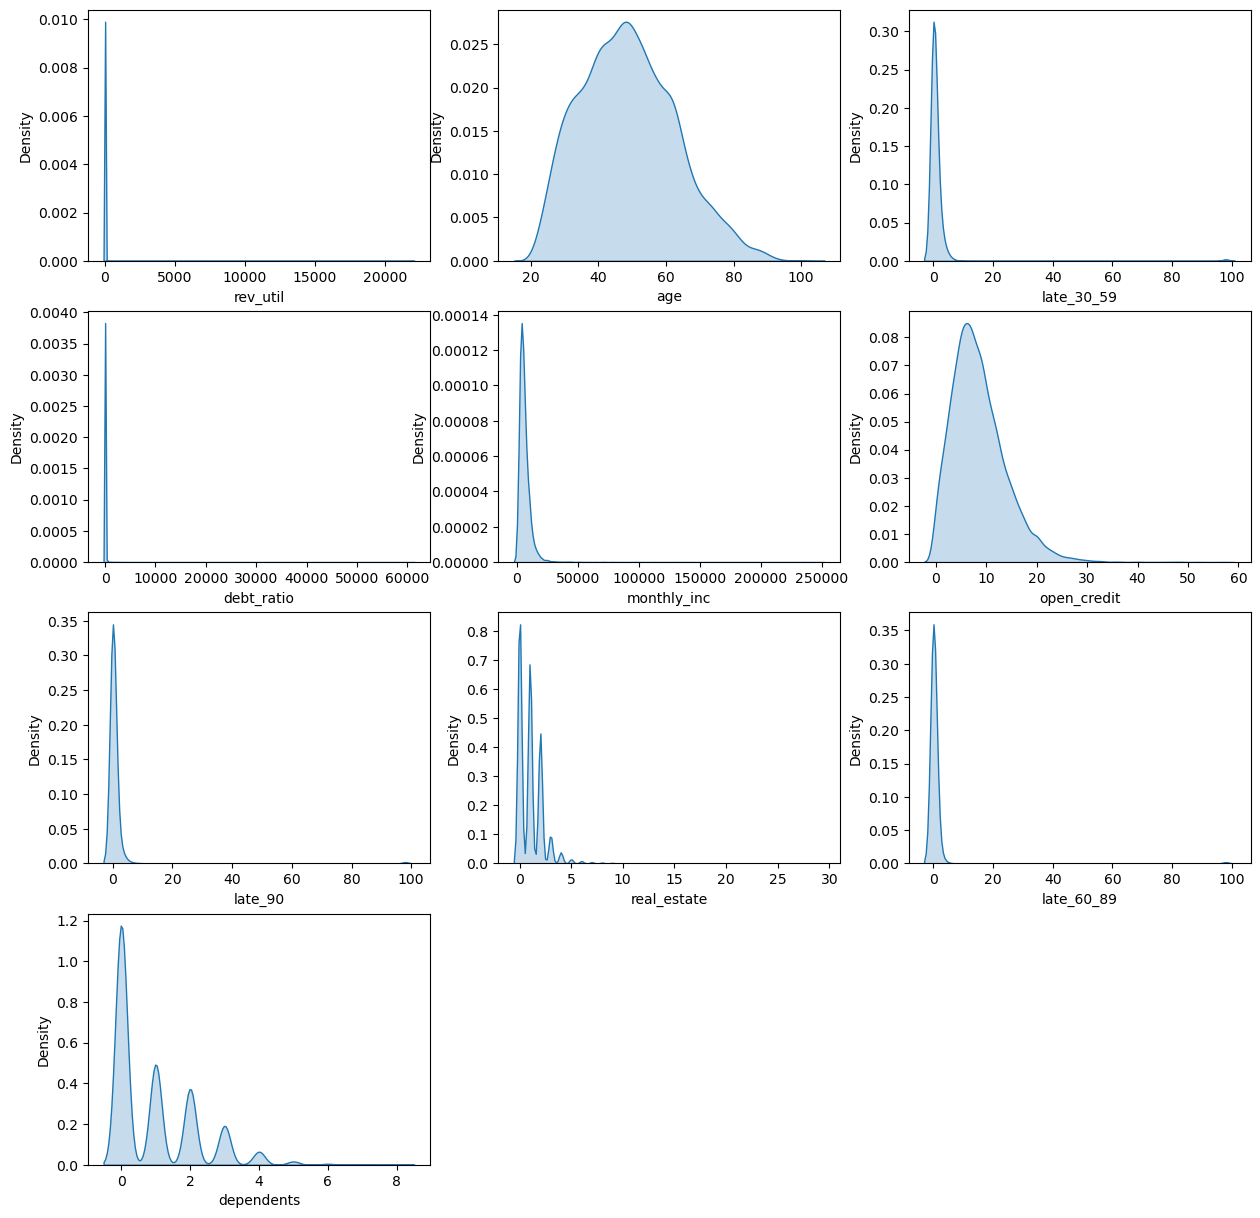

In [97]:
t=1
plt.figure(figsize=(15,15))
for i in data.columns:
  if i!='dlq_2yrs':
    plt.subplot(4,3,t)
    sns.kdeplot(data[i],shade=True)
    t+=1
plt.show()

<Axes: ylabel='count'>

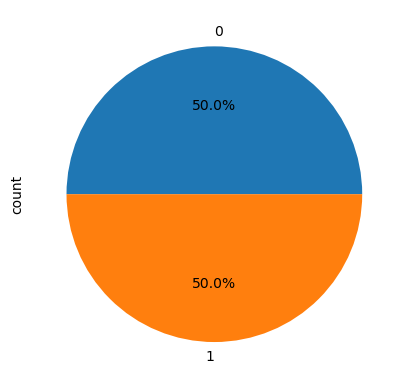

In [98]:
## Target Variable
data['dlq_2yrs'].value_counts().plot(kind='pie',autopct='%1.1f%%')

The target variable is perfectly balanced, with 50% of the data belonging to each class, indicating no class imbalance in the dataset.

## Bivariate Analysis

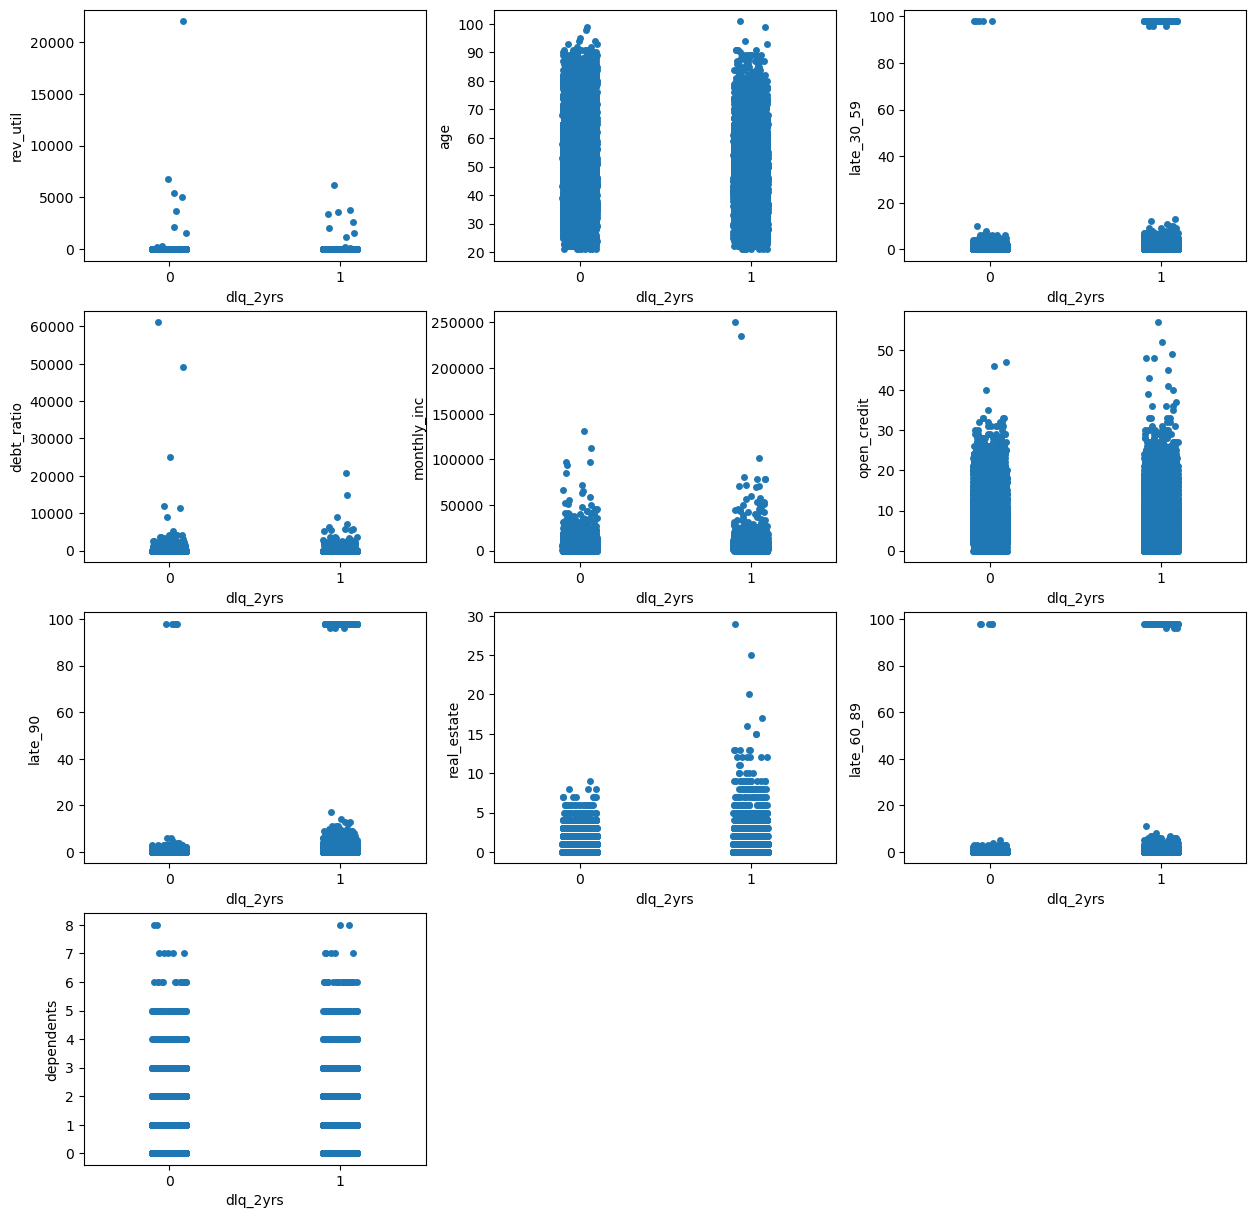

In [99]:
t=1
plt.figure(figsize=(15,15))
for i in data.columns:
  if i!='dlq_2yrs':
    plt.subplot(4,3,t)
    sns.stripplot(x='dlq_2yrs',y=i,data=data)
    t+=1
plt.show()

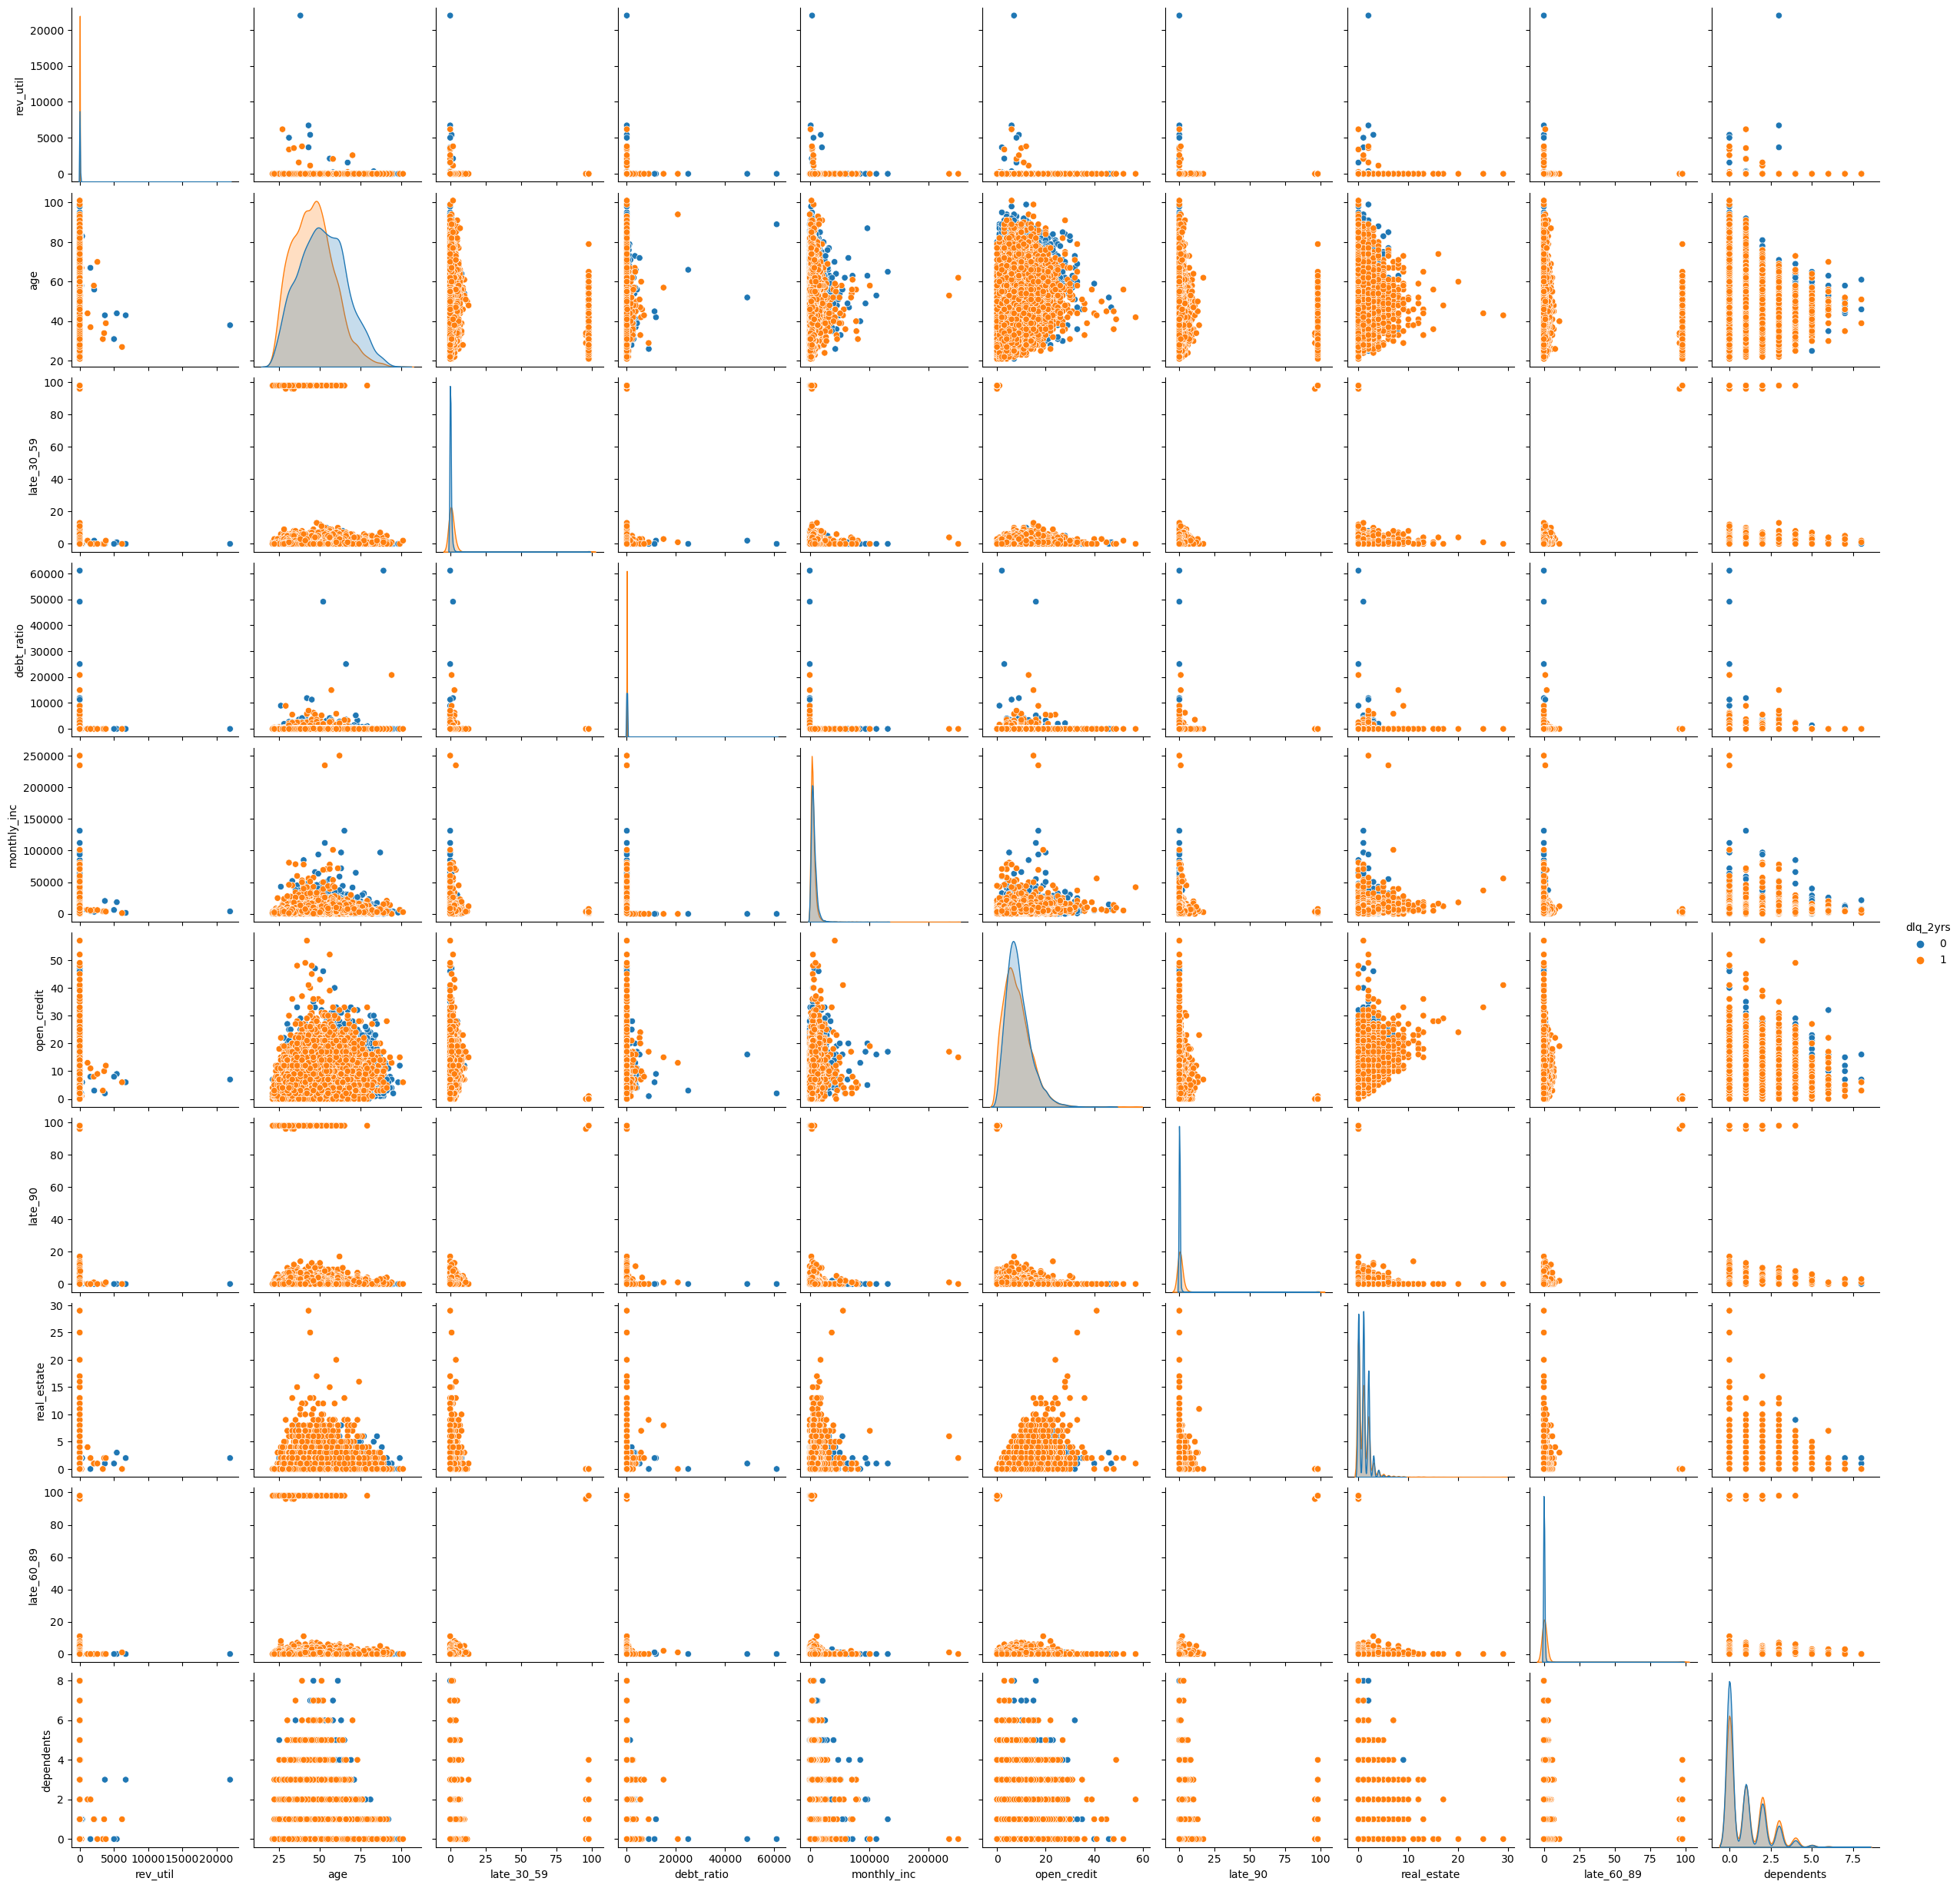

In [100]:
sns.pairplot(data,hue='dlq_2yrs')
plt.show()

## Data Preprocessing

In [101]:
## Checking Null Values
data.isnull().sum()

rev_util       0
age            0
late_30_59     0
debt_ratio     0
monthly_inc    0
open_credit    0
late_90        0
real_estate    0
late_60_89     0
dependents     0
dlq_2yrs       0
dtype: int64

In [102]:
## Create age bins
labels=['21–29', '30–39','40-49','50–59', '60–69','70-79' '80–89', '90+']
bins=[20,30,40,50,60,70,80,90]
data['age_group'] = pd.cut(data['age'], bins=bins, labels=labels, right=False)

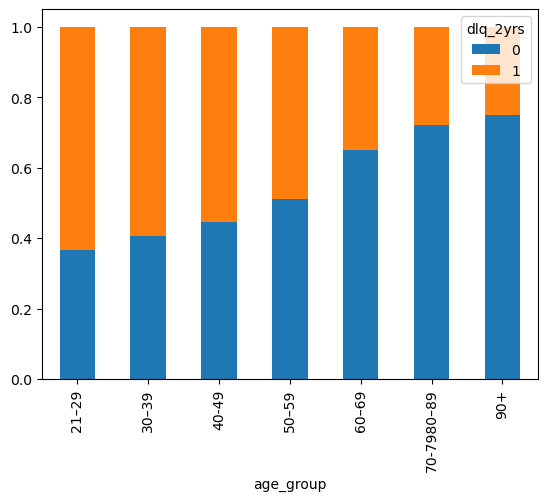

In [103]:
counts=pd.crosstab(index=data['age_group'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

In [104]:
bins=[-1,10,20,30,float('inf')]
labels=['0-9','10-19','20-29','30+']
data['open_credit_bins'] = pd.cut(data['open_credit'], bins=bins, labels=labels, right=False)

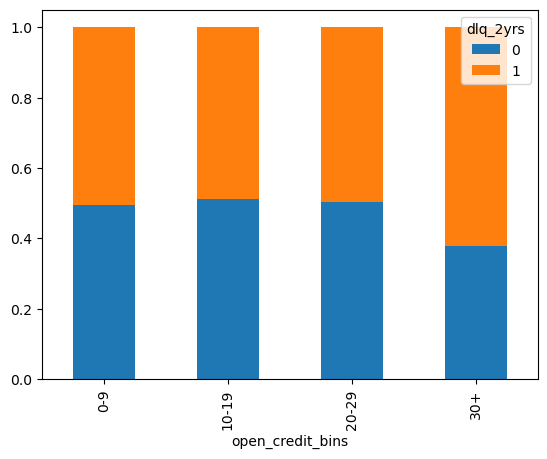

In [105]:
counts=pd.crosstab(index=data['open_credit_bins'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

In [106]:
bins = [-1, 1, 3, 5, float('inf')]
labels = ['0-1', '2-3', '4-5', '6+']
data['late_90_bins'] = pd.cut(data['late_90'], bins=bins, labels=labels)

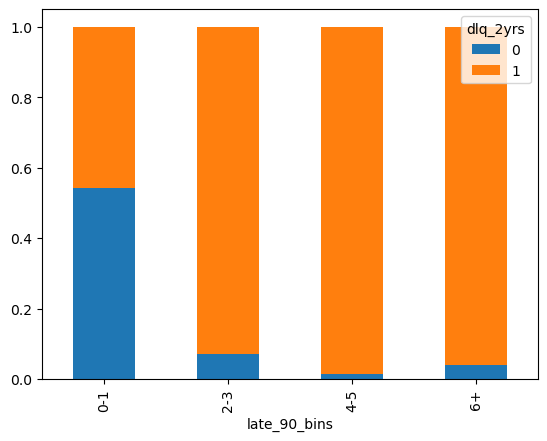

In [107]:
counts=pd.crosstab(index=data['late_90_bins'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

In [108]:
bins = [-1, 1, 3, 5, float('inf')]
labels = ['0-1', '2-3', '4-5', '6+']
data['late_30_59_bins'] = pd.cut(data['late_30_59'], bins=bins, labels=labels)

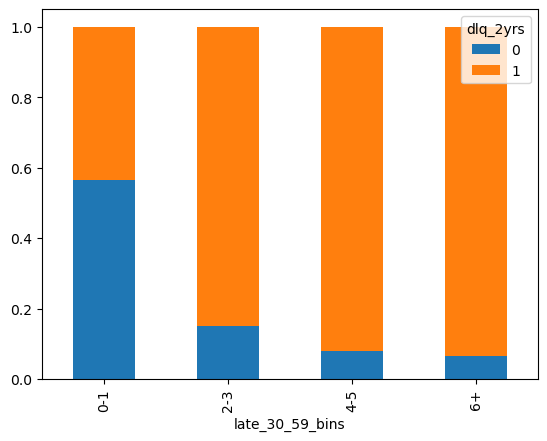

In [109]:
counts=pd.crosstab(index=data['late_30_59_bins'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

In [110]:
bins = [-1, 1, 3, 5, float('inf')]
labels = ['0-1', '2-3', '4-5', '6+']
data['late_60_89_bins'] = pd.cut(data['late_60_89'], bins=bins, labels=labels)

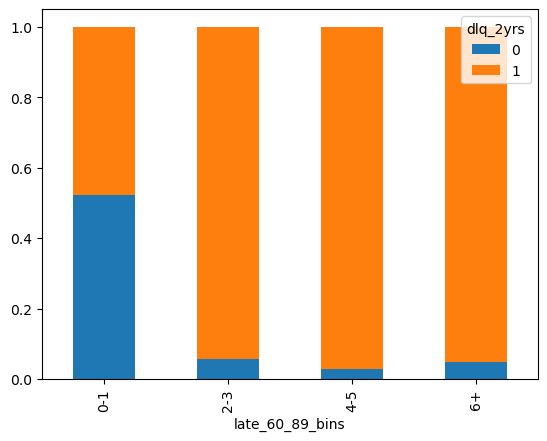

In [111]:
counts=pd.crosstab(index=data['late_60_89_bins'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

#### Conclusion for the above charts
Individuals with a history of multiple late payments are significantly more likely to experience serious delinquency within two years.

This trend suggests a strong positive association between frequent late payments and the likelihood of serious delinquency in the near future

In [112]:
## Total late
data['total_late']=data['late_30_59']+data['late_60_89']+data['late_90']

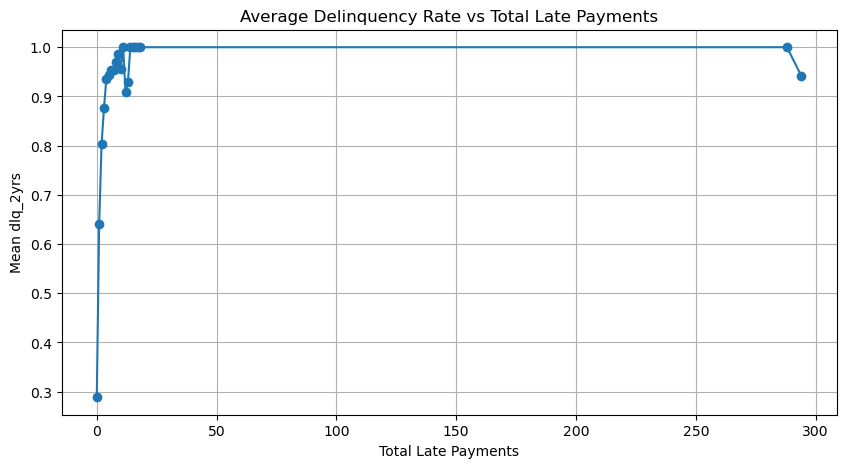

In [113]:
target_rate = data.groupby('total_late')['dlq_2yrs'].mean()

plt.figure(figsize=(10, 5))
target_rate.plot(kind='line', marker='o')
plt.title("Average Delinquency Rate vs Total Late Payments")
plt.ylabel("Mean dlq_2yrs")
plt.xlabel("Total Late Payments")
plt.grid(True)
plt.show()

As we can see there is a very strong posotive relation between total late payments and mean of deliquency in the next 2 years.

In [114]:
## Binning total_late
bins = [-1, 0, 1, 3, 6, 10, float('inf')]
labels = ['0', '1', '2-3', '4-6', '7-10', '10+']
data['total_late_bins'] = pd.cut(data['total_late'], bins=bins, labels=labels)

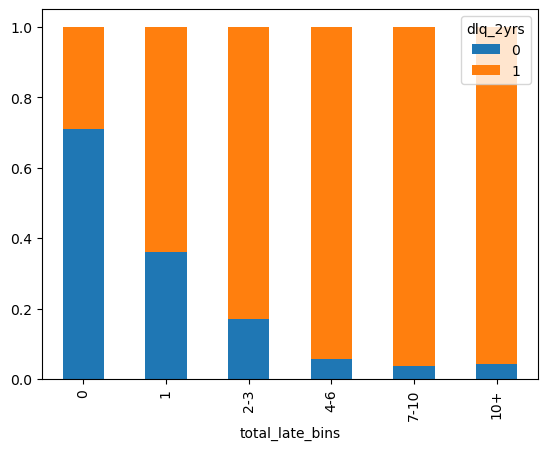

In [115]:
counts=pd.crosstab(index=data['total_late_bins'],columns=data['dlq_2yrs'],normalize='index')
counts.plot(kind='bar',stacked=True)
plt.show()

AS we can see from this as the no of late payments increases the chances of serious deliquency also increases.

## Hypothesis Testing

Deliquency in the next 2 years and Age

Ho: The average age is the same for individuals with and without serious delinquency.

Ha: The average age is significantly different for individuals with and without serious delinquency.

In [116]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==0]['age'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [117]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==0]['age'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [118]:
## Levene test
## Ho: The two groups has equal variance
## Ha: The two groups does not have equal variance
t_stat,pvalue=stats.levene(data[data['dlq_2yrs']==0]['age'],data[data['dlq_2yrs']==1]['age'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [119]:
## using mannwhitneyu
t_stat,pvalue=stats.mannwhitneyu(data[data['dlq_2yrs']==0]['age'],data[data['dlq_2yrs']==1]['age'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Monthly Income and serious deliquency

Ho: The average monthly income is same for with and without serious deliquency.

Ha: The average monthly income is significanlty different for with and without serous deliquency.

In [120]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==1]['monthly_inc'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [121]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==0]['monthly_inc'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [122]:
## Levene test
## Ho: The two groups has equal variance
## Ha: The two groups does not have equal variance
t_stat,pvalue=stats.levene(data[data['dlq_2yrs']==0]['age'],data[data['dlq_2yrs']==1]['age'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [123]:
## using mannwhitneyu
t_stat,pvalue=stats.mannwhitneyu(data[data['dlq_2yrs']==0]['monthly_inc'],data[data['dlq_2yrs']==1]['monthly_inc'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Deliquency and debt ratio

Ho: The average debt ratio is same for with and without deliquency

Ha: The average debt ratio is significantly same for with and without deliquency

In [124]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==1]['debt_ratio'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [125]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==1]['debt_ratio'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [126]:
## Levene test
## Ho: The two groups has equal variance
## Ha: The two groups does not have equal variance
t_stat,pvalue=stats.levene(data[data['dlq_2yrs']==0]['debt_ratio'],data[data['dlq_2yrs']==1]['debt_ratio'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


In [127]:
## using mannwhitneyu
t_stat,pvalue=stats.mannwhitneyu(data[data['dlq_2yrs']==0]['debt_ratio'],data[data['dlq_2yrs']==1]['debt_ratio'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Deliquency and ratio of revolving credit utilization

Ho: The average ratio of revolving credit utilization is same for with and without serious deliquency.

Ha: The average ratio of revolving credit utilization is significantly different for with and without serious deliquency.

In [128]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==1]['rev_util'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [129]:
## Normalty test
## Ho: The data is normally distributed
## Ha: The data is not normally distributed
t_stat,pvalue=stats.normaltest(data[data['dlq_2yrs']==0]['rev_util'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


In [130]:
## Levene test
## Ho: The two groups has equal variance
## Ha: The two groups does not have equal variance
t_stat,pvalue=stats.levene(data[data['dlq_2yrs']==0]['rev_util'],data[data['dlq_2yrs']==1]['rev_util'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


In [131]:
## using mannwhitneyu
t_stat,pvalue=stats.mannwhitneyu(data[data['dlq_2yrs']==0]['rev_util'],data[data['dlq_2yrs']==1]['rev_util'])
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Deliquency and dependents

Ho: There is no significant relation between the number of dependents and serious deliquency.

Ha: There is a significant relation between the number of dependents and serious deliquency.

In [132]:
data['dependents'].value_counts()

dependents
0.0    8474
1.0    3552
2.0    2685
3.0    1379
4.0     461
5.0     115
6.0      34
7.0      10
8.0       4
Name: count, dtype: int64

To meet the Chi-Square test assumption of expected frequencies ≥ 5, the last two dependents categories were merged. 
This ensured valid and reliable test results.

In [133]:
data['dependents']=data['dependents'].replace({8:7})

In [134]:
t_stat,pvalue,e,a=stats.chi2_contingency(pd.crosstab(index=data['dlq_2yrs'],columns=data['dependents']))
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Deliquency and number of open credit lines

Ho: There is no significant relationship between no. of open credit lines(bins) and serious deliquency.

Ha: There is a significant relationship between no. of open credit lines(bins) and serious deliquency.

In [135]:
t_stats,pvalue,e,a=stats.chi2_contingency(pd.crosstab(index=data['dlq_2yrs'],columns=data['open_credit_bins']))
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Accept Null Hypothesis


Deliquency and no. of times payment made 30-59 days late.

Ho: There is no significant relation between serious deliquency and no. of times paymnet made 30-59 days late (using bins).

Ha: There is a significant relation between serious deliquency and no. of times paymnet made 30-59 days late (using bins)

In [136]:
t_stats,pvalue,e,a=stats.chi2_contingency(pd.crosstab(index=data['dlq_2yrs'],columns=data['late_30_59_bins']))
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


Deliquency and no. of times payment made 60-89 days late.

Ho: There is no significant relation between serious deliquency and no. of times paymnet made 60-89 days late (using bins).

Ha: There is a significant relation between serious deliquency and no. of times paymnet made 60-89 days late (using bins).

In [137]:
t_stats,pvalue,e,a=stats.chi2_contingency(pd.crosstab(index=data['dlq_2yrs'],columns=data['late_60_89_bins']))
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis



Deliquency and no. of times payment made 90 days late.

Ho: There is no significant relation between serious deliquency and no. of times paymnet made 90 days late (using bins).

Ha: There is a significant relation between serious deliquency and no. of times paymnet made 90 days late (using bins).

In [138]:
t_stats,pvalue,e,a=stats.chi2_contingency(pd.crosstab(index=data['dlq_2yrs'],columns=data['late_90_bins']))
if pvalue<0.05:
  print('Reject Null Hypothesis')
else:
  print('Accept Null Hypothesis')

Reject Null Hypothesis


## Feature engineering

In [139]:
df=data.copy()
x=df.drop(['dlq_2yrs'],axis=1)
y=df['dlq_2yrs']

In [140]:
## Spliting the data before transforming

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [141]:
xtrain.shape,ytrain.shape,xtest.shape,ytest.shape

((13371, 17), (13371,), (3343, 17), (3343,))

In [142]:
pt=PowerTransformer()

In [143]:
xtrain[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']]=pt.fit_transform(xtrain[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']])

In [144]:
xtest[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']]=pt.fit_transform(xtest[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']])

In [145]:
sc=StandardScaler()

In [146]:
xtrain[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']]=sc.fit_transform(xtrain[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']])

In [147]:
xtest[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']]=sc.fit_transform(xtest[['rev_util','age','late_30_59','debt_ratio','monthly_inc','open_credit','late_90','late_60_89','total_late']])

In [148]:
xtrain

,rev_util,age,late_30_59,debt_ratio,monthly_inc,open_credit,late_90,real_estate,late_60_89,dependents,age_group,open_credit_bins,late_90_bins,late_30_59_bins,late_60_89_bins,total_late,total_late_bins
2954,-1.392793,1.022759,-0.683351,0.035136,-0.810726,-0.120032,-0.473422,0.0,-0.422335,0.0,60–69,0-9,0-1,0-1,0-1,-0.825373,0
9780,1.660968,-0.419952,-0.683351,-0.618607,-0.131838,-1.443036,2.173391,0.0,2.390597,5.0,40-49,0-9,6+,0-1,2-3,1.750590,7-10
7007,0.090985,0.028955,-0.683351,-0.044329,0.740099,0.912310,-0.473422,1.0,-0.422335,3.0,40-49,10-19,0-1,0-1,0-1,-0.825373,0
7991,1.046550,0.100495,-0.683351,0.271557,0.214387,0.438091,-0.473422,1.0,-0.422335,3.0,40-49,10-19,0-1,0-1,0-1,-0.825373,0
4295,1.115750,0.378355,-0.683351,0.613821,0.361056,0.077904,-0.473422,3.0,-0.422335,0.0,50–59,0-9,0-1,0-1,0-1,-0.825373,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,2.029094,0.772825,1.584279,-1.088130,0.023774,-0.820745,2.067281,0.0,2.388441,1.0,50–59,0-9,0-1,2-3,2-3,1.589551,4-6
11964,1.578172,-0.823807,-0.683351,1.056648,-0.934963,-0.820745,2.173611,0.0,2.357026,1.0,30–39,0-9,6+,0-1,0-1,1.750590,7-10
5390,-0.570555,-0.266352,-0.683351,0.772995,-0.186568,0.077904,-0.473422,3.0,-0.422335,1.0,40-49,0-9,0-1,0-1,0-1,-0.825373,0
860,-1.194215,1.380619,1.695212,0.269233,1.115200,1.459335,-0.473422,2.0,-0.422335,0.0,60–69,10-19,0-1,2-3,0-1,1.376106,2-3


In [149]:
xtrain_nobins=xtrain.drop(['age_group','open_credit_bins','late_90_bins','late_30_59_bins','late_60_89_bins','total_late_bins'],axis=1)

In [150]:
xtest_nobins=xtest.drop(['age_group','open_credit_bins','late_90_bins','late_30_59_bins','late_60_89_bins','total_late_bins'],axis=1)

In [151]:
m=[]
acu=[]
pre=[]
rec=[]
f1=[]
auc=[]
cohen=[]
def model_validation(x_train,y_train,x_test,y_test,model):

  model.fit(x_train,y_train)
  pred=model.predict(x_test)
  s_pred=model.predict_proba(x_test)[:,1]
  fpr,tpr,thresh=roc_curve(y_test,s_pred)

  plt.figure(figsize=(10,7))
  plt.plot(fpr,tpr,color='red')
  plt.plot([0,1],[0,1],color='blue')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.show()

  response = input('Do you want to save this model? Y/N : ')
  if response.lower() == 'y':
      global score_card
      m.append(model)
      acu.append(accuracy_score(y_test,pred))
      pre.append(precision_score(y_test,pred))
      rec.append(recall_score(y_test,pred))
      f1.append(f1_score(y_test,pred))
      auc.append(roc_auc_score(y_test,s_pred))
      cohen.append(cohen_kappa_score(y_test,pred))
      score_card = pd.DataFrame({'Model': m, 'Accuracy': acu, 'Recall': rec, 'Precision': pre, 'F1-score': f1, 'Cohen-Kappa': cohen})
      return score_card
  else:
      return None

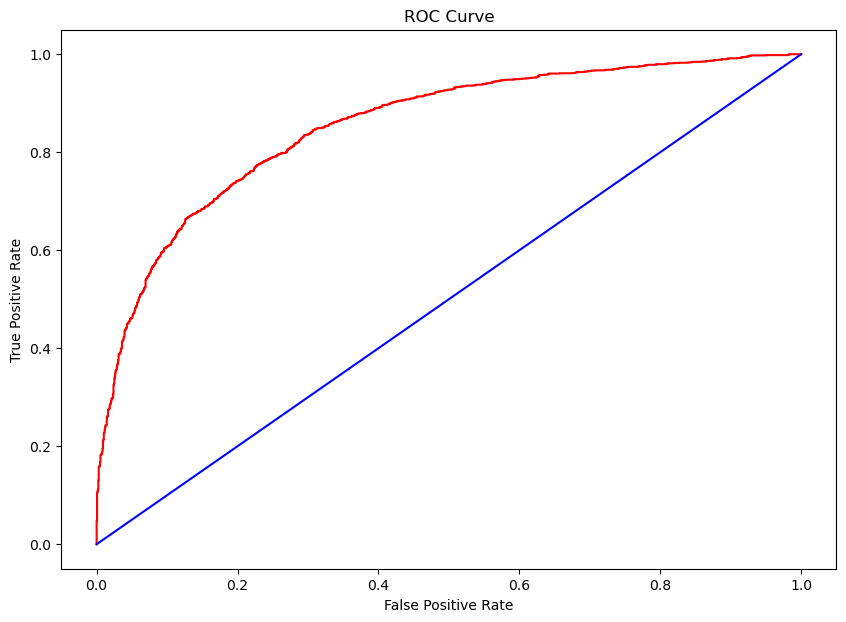

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349


In [152]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,LogisticRegression())

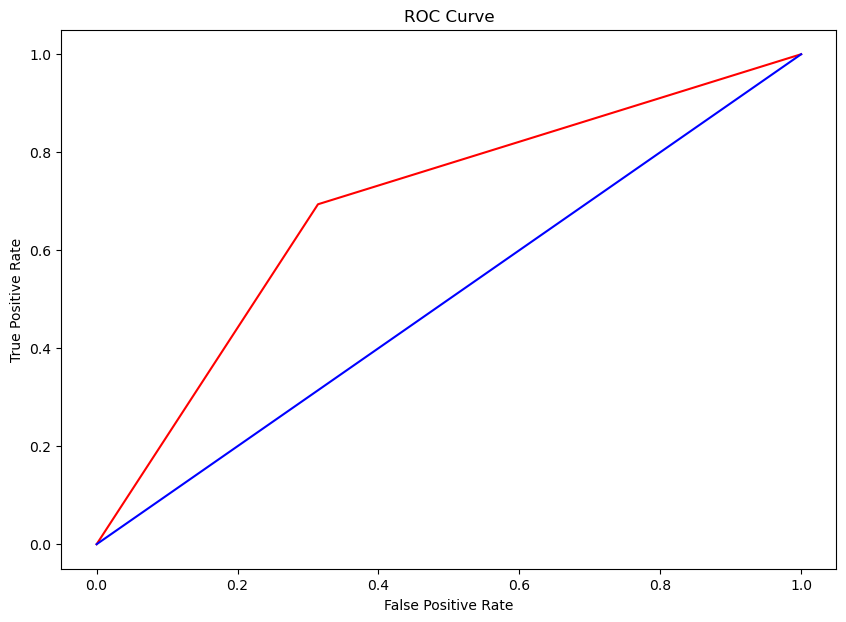

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598


In [153]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,DecisionTreeClassifier())

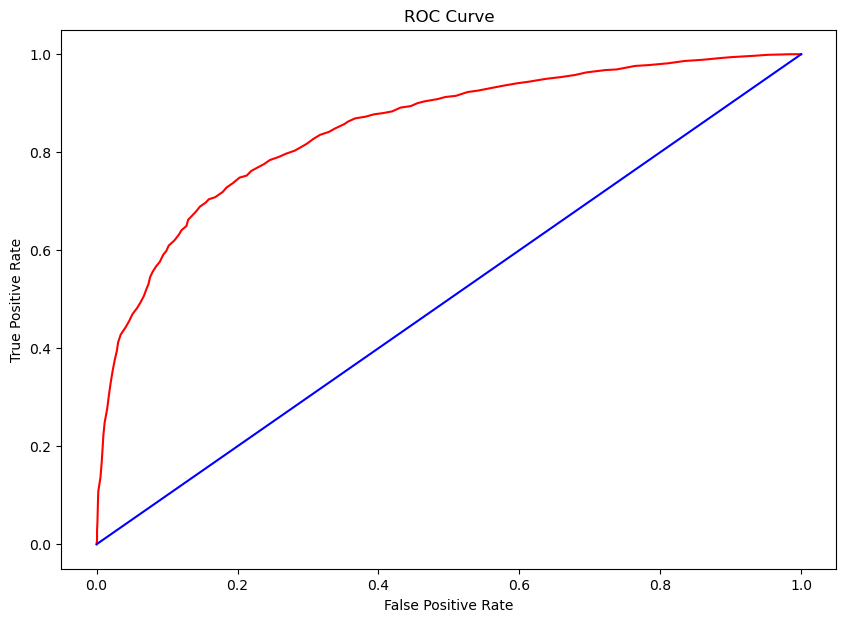

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330


In [154]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,RandomForestClassifier(n_jobs=-1))

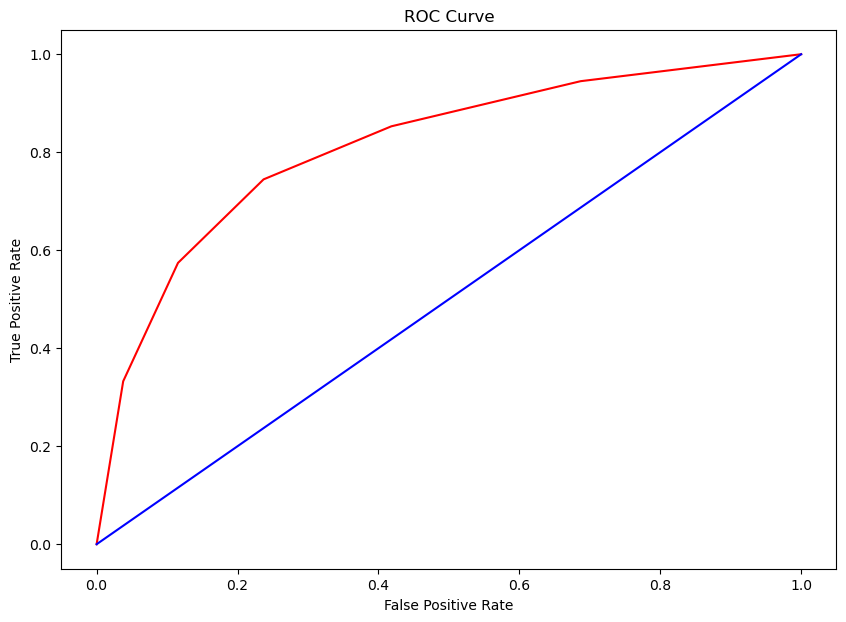

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330
3,KNeighborsClassifier(),0.753814,0.744617,0.758684,0.751585,0.507631


In [155]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,KNeighborsClassifier())

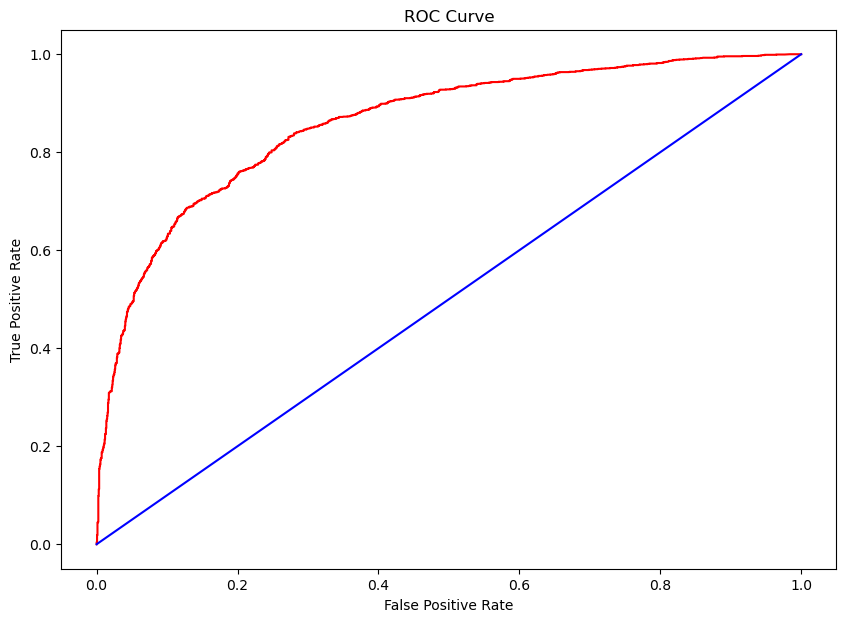

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330
3,KNeighborsClassifier(),0.753814,0.744617,0.758684,0.751585,0.507631
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.776847,0.764952,0.783701,0.774213,0.553697


In [156]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,GradientBoostingClassifier())

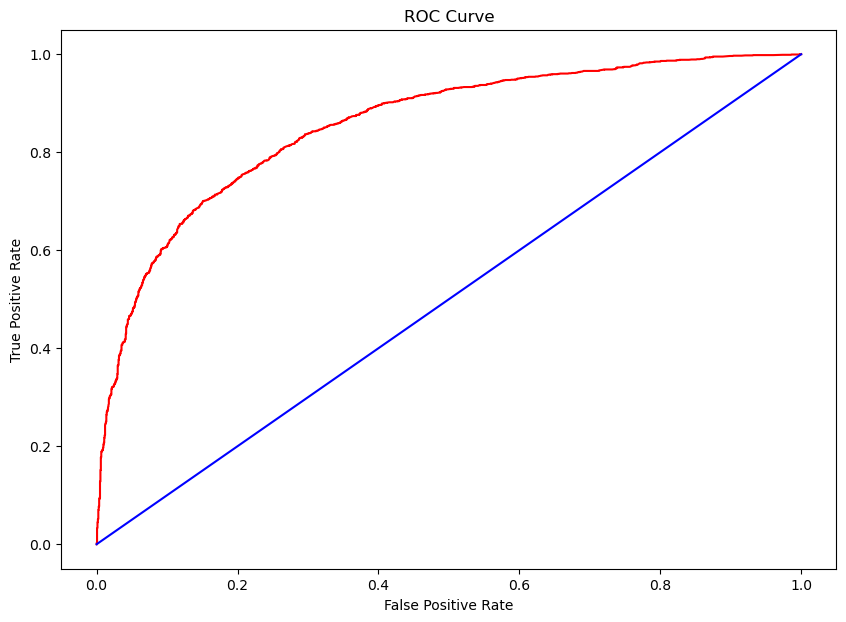

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330
3,KNeighborsClassifier(),0.753814,0.744617,0.758684,0.751585,0.507631
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.776847,0.764952,0.783701,0.774213,0.553697
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.772958,0.745813,0.788741,0.766677,0.545924


In [157]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,AdaBoostClassifier())

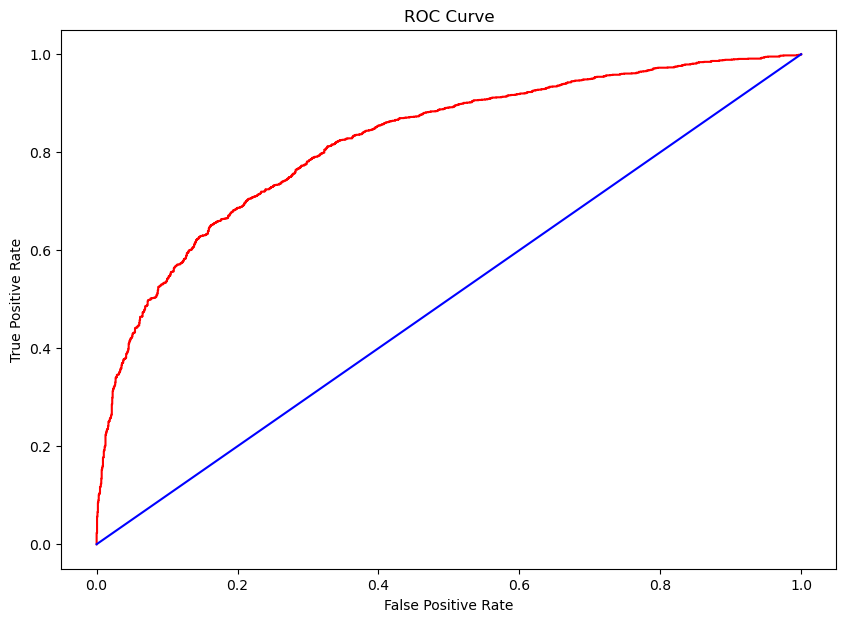

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330
3,KNeighborsClassifier(),0.753814,0.744617,0.758684,0.751585,0.507631
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.776847,0.764952,0.783701,0.774213,0.553697
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.772958,0.745813,0.788741,0.766677,0.545924
6,"XGBClassifier(base_score=None, booster=None, c...",0.742746,0.659689,0.791248,0.719504,0.485518


In [158]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,XGBClassifier())

In [159]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

In [160]:
gb = GradientBoostingClassifier()
param_dist = {
    'n_estimators': randint(50, 300),           # Number of trees: integer between 50 and 299
    'learning_rate': uniform(0.01, 0.2),        # Learning rate: float between 0.01 and 0.21
    'max_depth': randint(3, 10),                 # Max depth of trees: integer between 3 and 9
    'subsample': uniform(0.6, 0.4),             # Subsample fraction: float between 0.6 and 1.0
    'min_samples_split': randint(2, 11),        # Min samples to split node: integer 2 to 10
    'min_samples_leaf': randint(1, 5),          # Min samples per leaf: integer 1 to 4
    }

In [161]:
random_search = RandomizedSearchCV(
    estimator=gb,                  # Model to tune
    param_distributions=param_dist, # Where to sample params from
    n_iter=20,                    # Number of random parameter sets to try
    cv=5,                        # Use 5-fold cross-validation
    verbose=2,                   # Show progress and details
    random_state=42,             # Fix random seed for reproducibility
    n_jobs=-1                    # Use all CPU cores for faster computation
)
random_search.fit(xtrain_nobins, ytrain)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_iter=20,
                   n_jobs=-1,
                   param_distributions={'learning_rate': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E162A94690>,
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E158F53710>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure....zen object at 0x000001E158E659D0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E162A552D0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x000001E158DDAB90>,
                                        'subsample': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x000001E162A55E50>},
                   random_state=42, verbose=2)

In [162]:
best_params=random_search.best_params_

In [163]:
random_search.best_estimator_

GradientBoostingClassifier(learning_rate=0.0877354579378964, max_depth=4,
                           min_samples_leaf=3, min_samples_split=6,
                           n_estimators=73, subsample=0.7427013306774357)

In [164]:
print(random_search.best_score_)


0.7781765565256293


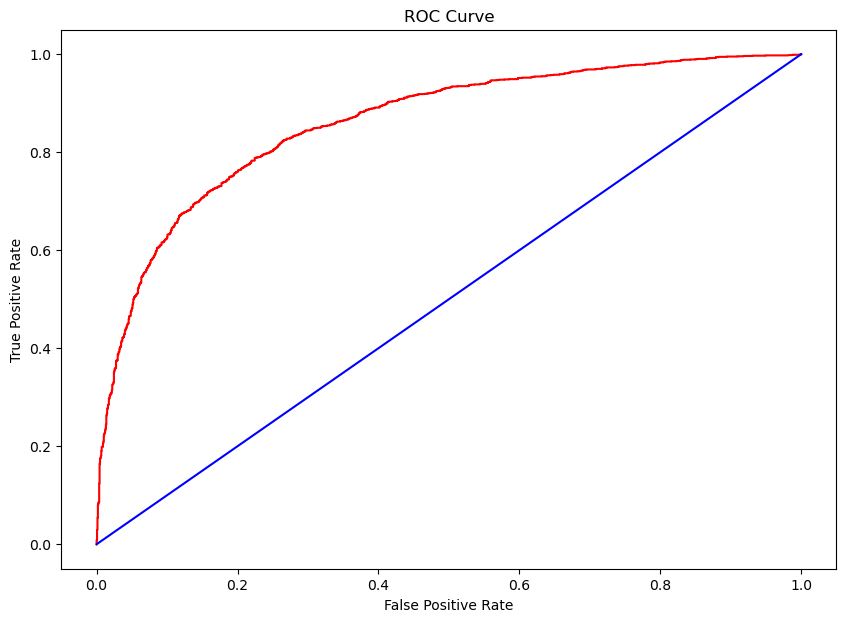

Do you want to save this model? Y/N :  y


,Model,Accuracy,Recall,Precision,F1-score,Cohen-Kappa
0,LogisticRegression(),0.769668,0.723086,0.797493,0.758469,0.539349
1,DecisionTreeClassifier(),0.689800,0.693780,0.688427,0.691093,0.379598
2,"(DecisionTreeClassifier(max_features='sqrt', r...",0.771164,0.761962,0.776356,0.769091,0.542330
3,KNeighborsClassifier(),0.753814,0.744617,0.758684,0.751585,0.507631
4,([DecisionTreeRegressor(criterion='friedman_ms...,0.776847,0.764952,0.783701,0.774213,0.553697
5,"(DecisionTreeClassifier(max_depth=1, random_st...",0.772958,0.745813,0.788741,0.766677,0.545924
6,"XGBClassifier(base_score=None, booster=None, c...",0.742746,0.659689,0.791248,0.719504,0.485518
7,([DecisionTreeRegressor(criterion='friedman_ms...,0.779838,0.769139,0.786064,0.777509,0.559680


In [165]:
model_validation(xtrain_nobins,ytrain,xtest_nobins,ytest,GradientBoostingClassifier(**best_params))

In [167]:
from sklearn.model_selection import cross_val_score
final_model = GradientBoostingClassifier(**best_params)

In [168]:
cv_scores = cross_val_score(final_model, xtrain_nobins, ytrain, cv=5, scoring='accuracy')

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))
print("Standard Deviation of CV Accuracy:", np.std(cv_scores))

Cross-validation scores: [0.78280374 0.78384443 0.77823485 0.77449514 0.7737472 ]
Mean CV Accuracy: 0.7786250707749949
Standard Deviation of CV Accuracy: 0.004140174660975916


In [170]:
final_model.fit(xtrain_nobins,ytrain)

GradientBoostingClassifier(learning_rate=0.0877354579378964, max_depth=4,
                           min_samples_leaf=3, min_samples_split=6,
                           n_estimators=73, subsample=0.7427013306774357)

In [182]:
df_imp=pd.DataFrame(final_model.feature_importances_,index=xtrain_nobins.columns,columns=['Feature_importance']).sort_values(by='Feature_importance',ascending=False)

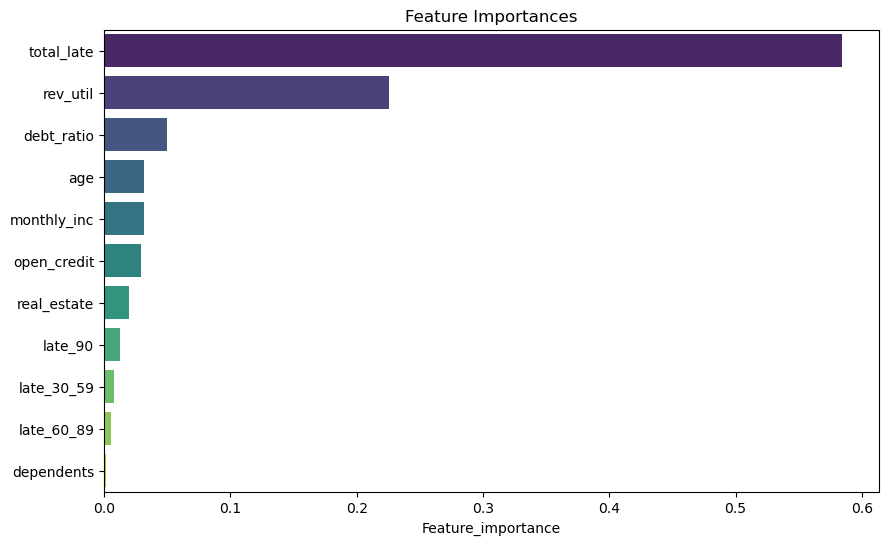

In [183]:
plt.figure(figsize=(10, 6))
sns.barplot(y=df_imp.index, x='Feature_importance', data=df_imp, palette='viridis')
plt.title('Feature Importances')
plt.show()

I visualized the feature importances from the trained GradientBoostingClassifier. Feature importance helps us identify which features the model relied on most to make predictions.

The most important feature is total_late, contributing approximately 58% of the total importance.

The next most significant features are rev_util and debt_ratio, but they contribute significantly less than total_late.

Features like dependents, late_60_89, and late_30_59 have very low importance values.